## 1.- ¿Como podemos evaluar funciones en matrices? Hint: ¿que operaciones sabemos que estan bien definidas sobre matrices?



La operacion $A^n$ con $n\in \mathbb{N}$ esta bien definida. Por lo tanto si la función en cuestión es analítica en $z = 0$ (o  si es real diferenciable con derivadas de cualquier orden) podría definirse su operación en matrices utilizando la expansión de Taylor. 

$$f(A) = \sum_{k = 0}^{\infty} \frac{f^{(k)}(0)}{k!} A^{k}$$

Otra opción es utilizar el teorema de Cauchy (el cual es un caso particular del teorema del residuo). En este caso definimos la función en A como. 

$$f(A) = \frac{1}{2\pi i}\oint_C f(z) (zI-A)^{-1} dz$$

La región donde C de integración es una curva que encierra a todos los eigenvalores de la matriz A. La razón por la que se pide esto es que de alguna forma cada uno de esos valores contribuye a la "singularidad" que surge al dividir la función por $(zI -A)^-1$, entonces estos deben incluirse dentro de la región.


## 2.-¿Como se define una matriz simétrica?

Una matriz simétrica es aquella que es igual a su transpuesta, es decir:

$$A^{T} = A$$

Dichas matrices presentan simetria respecto a la diagonal, de forma que cuando se hace una reflexión respecto a esta la matriz queda igual. 


## 3.-¿Como puede construir una matriz simétrica a partir de cualquier matriz cuadrada?

Una forma sencilla es sumarle su transpuesta. Es sencillo demostrar que la matriz resultante es simétrica. Sea $A$ una matriz cuadrada y $A^{T}$ su transpuesta. entonces la entrada $i,j$ de la matriz $S = A + A^T$ es 

\begin{aligned}
S_{ij} &= A_{ij} +A_{ij}^{T} \\
&= A_{ij} +A_{ji}\\
&=A_{ji} +A_{ij}\\
&=A_{ji} +A_{ji}^T\\
&=S_{ji} = S_{ij}^T
\end{aligned}

Por lo tanto la matriz S es simétrica. 



## Ejercicio 4: Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice: $$A=\left(\begin{array}{cc} -1 & 1\\ -1 & -1 \end{array} \right).$$
Grafique la trayectoria en el espacio de fase.
Recuerde que $\vec x(t) = e^{A t}\vec x_0$, y necesitamos graficar la trayectoria $\vec x(t)$ en el espacio de fase.

In [25]:
function propagarMatrizExponencial(A,h,t0,tf,y0)
    
    diagonal = diagm(exp.(eigvals(A)))
    w = eigvecs(A)
    expA(t) = w*diagm(exp.(eigvals(A)*t))*inv(w)
    funcionDerivada(t) = A*expA(t)
    solucion = []
    derivadas = []
    times = []
    push!(times,t0)
    push!(solucion,expA(t0)*y0)
    push!(derivadas,funcionDerivada(t0)*y0)
    while(last(times)<tf)
        push!(times,last(times)+h)
        push!(solucion,expA(last(times))*y0)
        push!(derivadas,funcionDerivada(last(times))*y0)
    end
    return [times,solucion,derivadas]
    end 

propagarMatrizExponencial (generic function with 1 method)

In [26]:

#=Funcion auxiliar que da el ultimo elemento de un arreglo=#
function last(A)
    return A[length(A)]
end

last (generic function with 1 method)

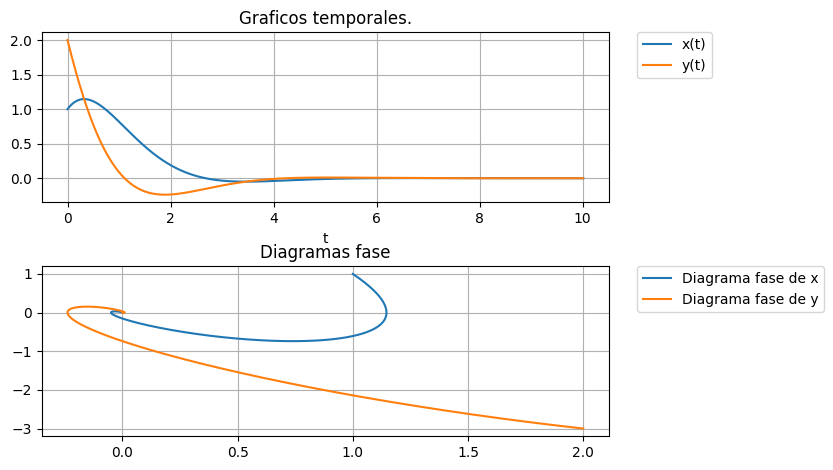

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f0a20bcb290>

In [27]:
A = [-1 1; -1 -1]
sol = propagarMatrizExponencial(A,0.01,0,10,[1 ;2])

xCord(x) = x[1]
yCord(x) = x[2]

using PyPlot
plt = PyPlot

    plt.subplot(2,1,1)
    plt.xlabel("t")
    plt.grid()
    plt.title("Graficos temporales.")
    plt.tight_layout()
    plt.plot(xCord.(sol[1]),xCord.(sol[2]),label = "x(t)")
    plt.plot(xCord.(sol[1]),yCord.(sol[2]),label = "y(t)")
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
    
    plt.subplot(2,1,2)
    plt.tight_layout()
    plt.title("Diagramas fase")
    plt.grid()
    plt.plot(xCord.(sol[2]),xCord.(sol[3]),label = "Diagrama fase de x")
    plt.plot(yCord.(sol[2]),yCord.(sol[3]),label = "Diagrama fase de y")
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
    ax = gca()
